### Получение данных

In [28]:
import glob
import random
from sklearn.model_selection import train_test_split

mx_token = 0

data = []

for filename in glob.glob('data/*'):
  with open(filename) as file:
    lines = [line.strip() for line in file]
  
  title = [int(item) for item in lines[0].split(' ')[1:]]
  body = [int(item) for item in lines[2].split(' ')]
  
  if len(title) != 0:
    mx_token = max(mx_token, max(title))
  
  if len(body) != 0:
    mx_token = max(mx_token, max(body))

  if 'legit' in filename:
    data.append((title, body, 1))
  else:
    data.append((title, body, 0))

random.shuffle(data)
train, test = train_test_split(data, test_size=0.2)

print('Max token value:', mx_token)
mx_token += 1

Max token value: 24747


In [43]:
from scipy.sparse import csr_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from matplotlib import pyplot as plt

In [38]:
def get_targets(pool):
  result = []
  for (_, _, target) in pool:
    result.append(target)
  return result

train_targets = get_targets(train)
test_targets = get_targets(test)

### 1. Заголовок и текст вместе, признак для слова -- встретилось/нет

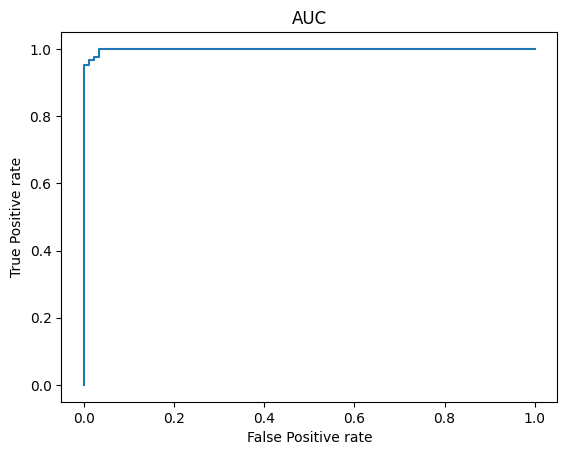

AUC: 0.9988785369220151


In [64]:
def make_common_attendance_features(pool):
  features = []

  for (title, body, target) in pool:
    this_features = [0] * mx_token
    for token in title:
      this_features[token] = 1
    for token in body:
      this_features[token] = 1
    
    features.append(this_features)

  return csr_matrix(features)

train_features = make_common_attendance_features(train)
test_features = make_common_attendance_features(test)

model = MultinomialNB()
model.fit(train_features, train_targets)
predicts = model.predict_proba(test_features)

fpr, tpr, _ = metrics.roc_curve(test_targets, predicts[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.show()

print('AUC:', metrics.roc_auc_score(test_targets, predicts[:, 1]))

### 2. Заголовок и текст вместе, признак для слова -- количество 

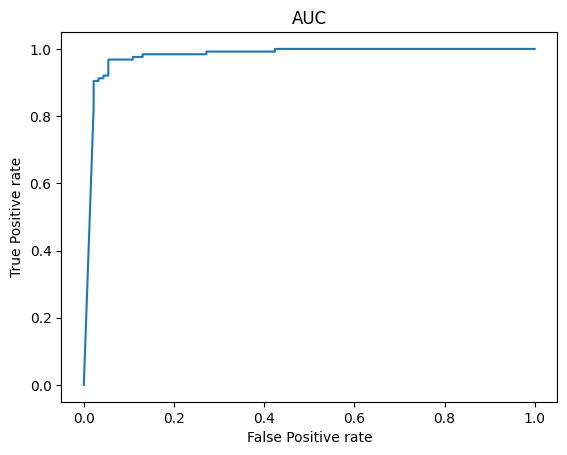

AUC: 0.9786922015182885


In [65]:
def make_common_amount_features(pool):
  features = []

  for (title, body, target) in pool:
    this_features = [0] * mx_token
    for token in title:
      this_features[token] += 1
    for token in body:
      this_features[token] += 1
    
    features.append(this_features)

  return csr_matrix(features)

train_features = make_common_amount_features(train)
test_features = make_common_amount_features(test)

model = MultinomialNB()
model.fit(train_features, train_targets)
predicts = model.predict_proba(test_features)

fpr, tpr, _ = metrics.roc_curve(test_targets, predicts[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.show()

print('AUC:', metrics.roc_auc_score(test_targets, predicts[:, 1]))

### 3. Заголовок и текст отдельно, признак для слова -- встретилось/нет

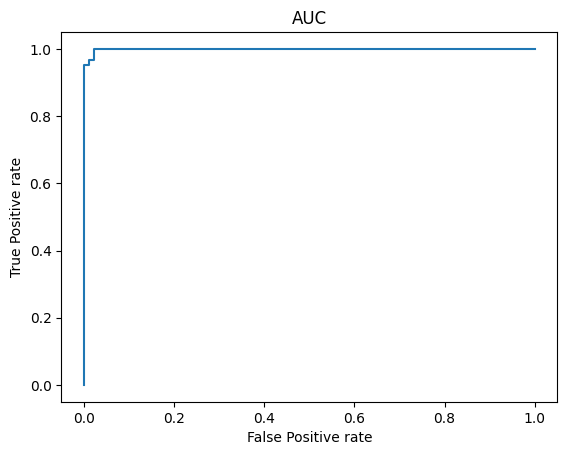

AUC: 0.9991373360938578


In [66]:
def make_splitted_attendance_features(pool):
  features = []

  for (title, body, target) in pool:
    this_features = [0] * (mx_token * 2)
    for token in title:
      this_features[token] = 1
    for token in body:
      this_features[token + mx_token] = 1
    
    features.append(this_features)

  return csr_matrix(features)

train_features = make_splitted_attendance_features(train)
test_features = make_splitted_attendance_features(test)

model = MultinomialNB()
model.fit(train_features, train_targets)
predicts = model.predict_proba(test_features)

fpr, tpr, _ = metrics.roc_curve(test_targets, predicts[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.show()

print('AUC:', metrics.roc_auc_score(test_targets, predicts[:, 1]))

### 4. Загловок и текст отдельно, признак для слова -- количество

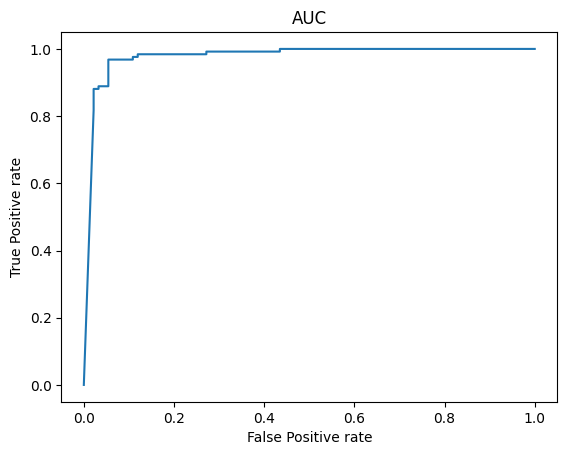

AUC: 0.977743271221532


In [67]:
def make_splitted_amount_features(pool):
  features = []

  for (title, body, target) in pool:
    this_features = [0] * (mx_token * 2)
    for token in title:
      this_features[token] += 1
    for token in body:
      this_features[token + mx_token] += 1
    
    features.append(this_features)

  return csr_matrix(features)

train_features = make_splitted_amount_features(train)
test_features = make_splitted_amount_features(test)

model = MultinomialNB()
model.fit(train_features, train_targets)
predicts = model.predict_proba(test_features)

fpr, tpr, _ = metrics.roc_curve(test_targets, predicts[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.show()

print('AUC:', metrics.roc_auc_score(test_targets, predicts[:, 1]))